In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
import seaborn as sns

In [4]:
df=pd.read_csv("file_train_senza_outliers.csv", skipinitialspace=True )

In [5]:
df

name  duration_ms  \
0                                              Long Road       241.76   
1                   Daniâl My Son, Where Did You Vanish?       444.00   
2                                     Ondskapens Galakse       333.51   
3                                        Can't Look Away       269.80   
4                                          Thunderground       307.65   
...                                                  ...          ...   
13542                                              Outpt       432.03   
13543  Natural Environment Sounds: To Improve Sleep a...       182.75   
13544                               Psychological Attack       400.09   
13545             Don't Hate The 808 (feat. Lafa Taylor)       197.25   
13546                                    Parchaiyon Mein       198.41   

       explicit                         artists  \
0         False                   Funki Porcini   
1         False                   Siavash Amini   
2         False                       Kvelertak   
3         False               The Wood Brothers   
4         False          The Darkraver;DJ Vince   
...         ...                             ...   
13542     False                        Autechre   
13543     False  Natural White Noise Relaxation   
13544     False                         Droplex   
13545     False          Bassnectar;Lafa Taylor   
13546     False                   Ashwin Adwani   

                                              album_name  danceability  \
0                                          Hed Phone Sex          0.69   
1                                   A Trail of Laughters          0.07   
2                                             Nattesferd          0.36   
3                                      One Drop of Truth          0.52   
4                                 Happy Hardcore Top 100          0.64   
...                                                  ...           ...   
13542                                                EP7          0.55   
13543  Baby Sleep White Noise: Ultimate Album to Help...          0.10   
13544                               Psychological Attack          0.80   
13545                                    Noise vs Beauty          0.51   
13546                                    Parchaiyon Mein          0.68   

       energy  key  loudness  mode  ...  acousticness  instrumentalness  \
0        0.51    5    -12.53   1.0  ...          0.30              0.54   
1        0.20    1    -24.80   0.0  ...          0.28              0.93   
2        0.85    2     -7.44   1.0  ...          0.00              0.80   
3        0.58    5     -5.61   1.0  ...          0.07              0.00   
4        0.69    7    -11.34   1.0  ...          0.00              0.10   
...       ...  ...       ...   ...  ...           ...               ...   
13542    0.66    1    -14.23   1.0  ...          0.02              0.62   
13543    0.86    1    -19.63   1.0  ...          0.55              0.94   
13544    0.54    1     -9.10   1.0  ...          0.00              0.86   
13545    0.97    5     -2.30   1.0  ...          0.00              0.00   
13546    0.52    6     -7.79   1.0  ...          0.46              0.00   

       liveness  valence   tempo  time_signature  n_beats  n_bars  processing  \
0          0.28     0.64  142.22          4.0000    567.0   141.0        1.28   
1          0.36     0.03   75.60          4.0000    617.0   155.0        2.37   
2          0.26     0.49  116.63          4.0000    652.0   162.0        3.70   
3          0.12     0.38  140.88          4.0000    619.0   155.0        1.28   
4          0.30     0.64  143.96          4.0000    733.0   183.0        4.07   
...         ...      ...     ...             ...      ...     ...         ...   
13542      0.13     0.03  117.32          3.9201    837.0   212.0        2.37   
13543      0.12     0.00   92.32          3.0000    277.0    92.0        2.37   
13544      0.07     0.07  126.00          4

In [6]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'artists', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'n_beats', 'n_bars', 'processing', 'genre'],
      dtype='object')

In [7]:
dk=df.drop(['name', 'explicit', 'artists','key', 'mode', 'album_name', 'genre'], axis=1) #tolgo variabili categoriali

In [8]:
dk.values # valori continui

array([[2.4176e+02, 6.9000e-01, 5.1000e-01, ..., 5.6700e+02, 1.4100e+02,
        1.2800e+00],
       [4.4400e+02, 7.0000e-02, 2.0000e-01, ..., 6.1700e+02, 1.5500e+02,
        2.3700e+00],
       [3.3351e+02, 3.6000e-01, 8.5000e-01, ..., 6.5200e+02, 1.6200e+02,
        3.7000e+00],
       ...,
       [4.0009e+02, 8.0000e-01, 5.4000e-01, ..., 8.3700e+02, 2.0900e+02,
        2.3700e+00],
       [1.9725e+02, 5.1000e-01, 9.7000e-01, ..., 5.1300e+02, 1.3000e+02,
        1.2800e+00],
       [1.9841e+02, 6.8000e-01, 5.2000e-01, ..., 2.8600e+02, 7.2000e+01,
        1.1700e+00]])

In [9]:

X = dk.values
genres = sorted(df['genre'].unique())
y_mapped = dict(zip(genres, range(0, len(genres) + 1)))
y_mapped

{'afrobeat': 0,
 'black-metal': 1,
 'bluegrass': 2,
 'brazil': 3,
 'breakbeat': 4,
 'chicago-house': 5,
 'disney': 6,
 'forro': 7,
 'happy': 8,
 'idm': 9,
 'indian': 10,
 'industrial': 11,
 'iranian': 12,
 'j-dance': 13,
 'j-idol': 14,
 'mandopop': 15,
 'sleep': 16,
 'spanish': 17,
 'study': 18,
 'techno': 19}

In [10]:
X

array([[2.4176e+02, 6.9000e-01, 5.1000e-01, ..., 5.6700e+02, 1.4100e+02,
        1.2800e+00],
       [4.4400e+02, 7.0000e-02, 2.0000e-01, ..., 6.1700e+02, 1.5500e+02,
        2.3700e+00],
       [3.3351e+02, 3.6000e-01, 8.5000e-01, ..., 6.5200e+02, 1.6200e+02,
        3.7000e+00],
       ...,
       [4.0009e+02, 8.0000e-01, 5.4000e-01, ..., 8.3700e+02, 2.0900e+02,
        2.3700e+00],
       [1.9725e+02, 5.1000e-01, 9.7000e-01, ..., 5.1300e+02, 1.3000e+02,
        1.2800e+00],
       [1.9841e+02, 6.8000e-01, 5.2000e-01, ..., 2.8600e+02, 7.2000e+01,
        1.1700e+00]])

## Normalization

In [11]:
# z-score, fit and then transform
scaler = StandardScaler()
scaler.fit(X) ## addestra
X_scal = scaler.transform(X) 

In [12]:
# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [13]:
X_minmax

array([[0.36259002, 0.68817204, 0.51      , ..., 0.40706605, 0.38662791,
        0.15963855],
       [0.69512315, 0.02150538, 0.2       , ..., 0.44546851, 0.42732558,
        0.48795181],
       [0.51344997, 0.33333333, 0.85      , ..., 0.47235023, 0.44767442,
        0.88855422],
       ...,
       [0.62292413, 0.80645161, 0.54      , ..., 0.61443932, 0.58430233,
        0.48795181],
       [0.28940445, 0.49462366, 0.97      , ..., 0.3655914 , 0.35465116,
        0.15963855],
       [0.29131178, 0.67741935, 0.52      , ..., 0.19124424, 0.18604651,
        0.12650602]])

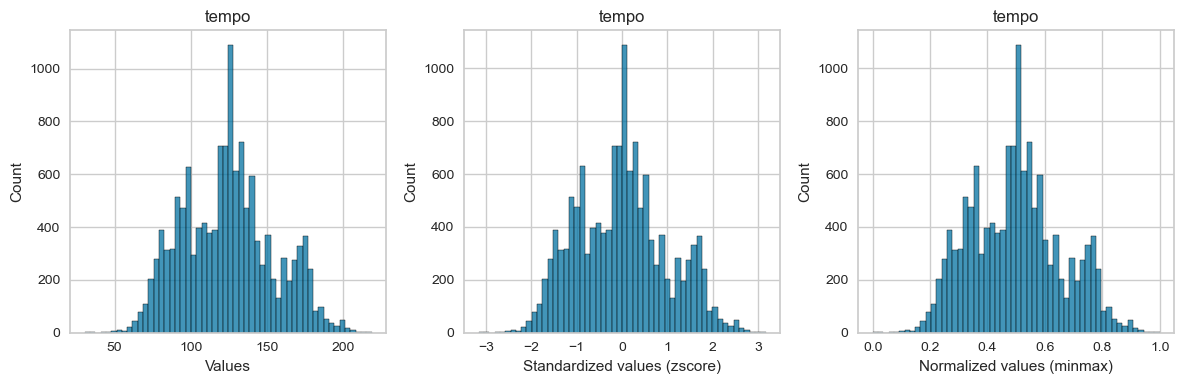

In [14]:
i = 9 # column index
fig, axs = plt.subplots(1,3, figsize=(12, 4)) # 1 row, 3 columns

sns.histplot(X[:,i], ax=axs[0]).set(title=dk.columns[i])
axs[0].set(xlabel='Values')

sns.histplot(X_scal[:,i], ax=axs[1]).set(title=dk.columns[i])
axs[1].set(xlabel='Standardized values (zscore)')

sns.histplot(X_minmax[:,i], ax=axs[2]).set(title=dk.columns[i])
axs[2].set(xlabel='Normalized values (minmax)')

plt.tight_layout() # Adjust the padding between and around subplots

## Identification of k

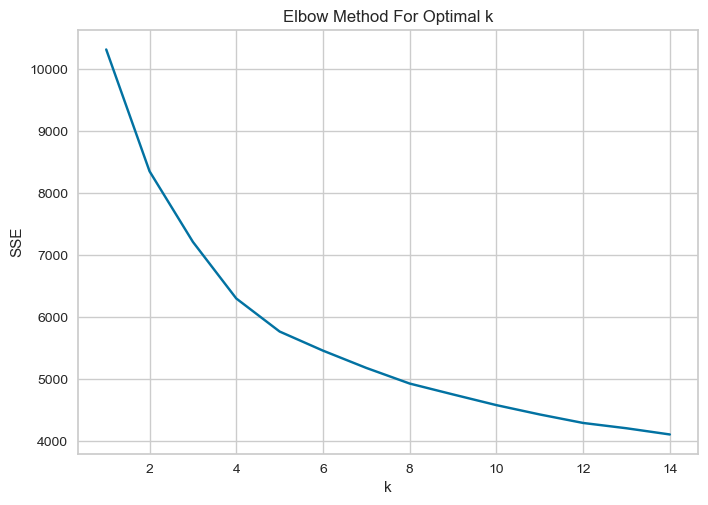

In [15]:

Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(X_minmax)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

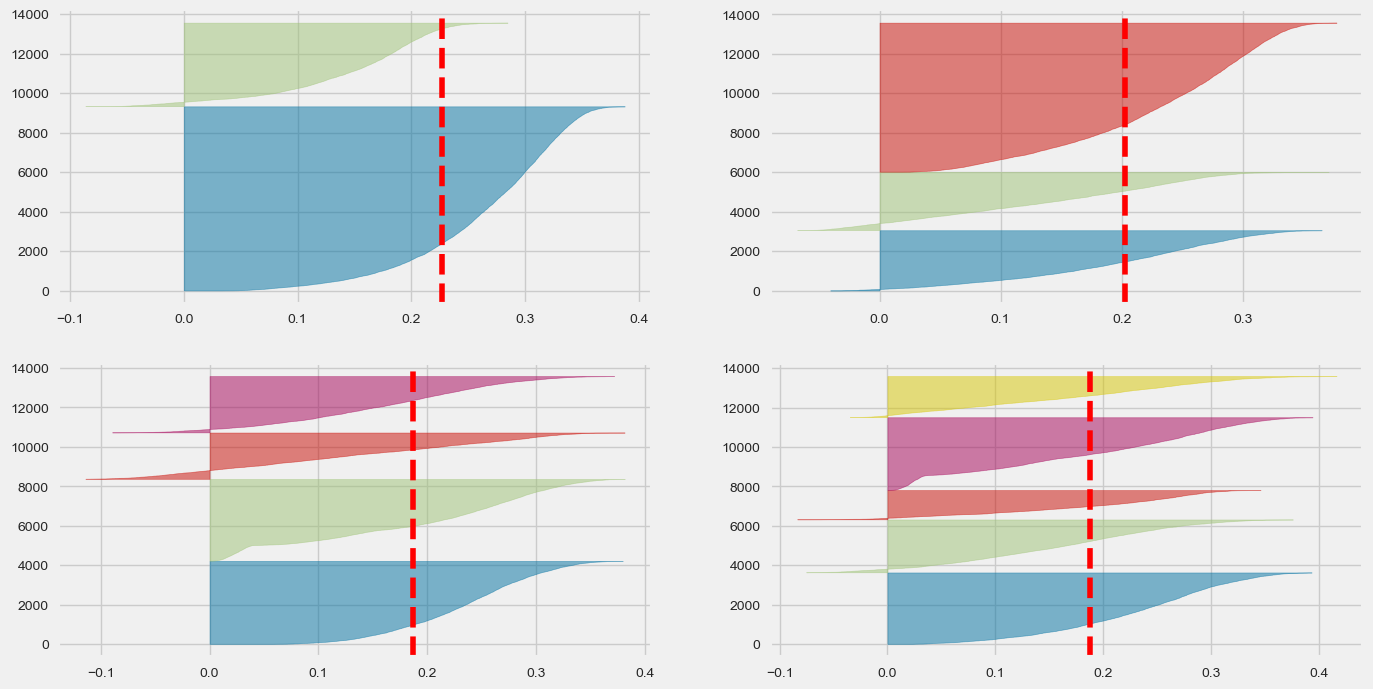

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_minmax)

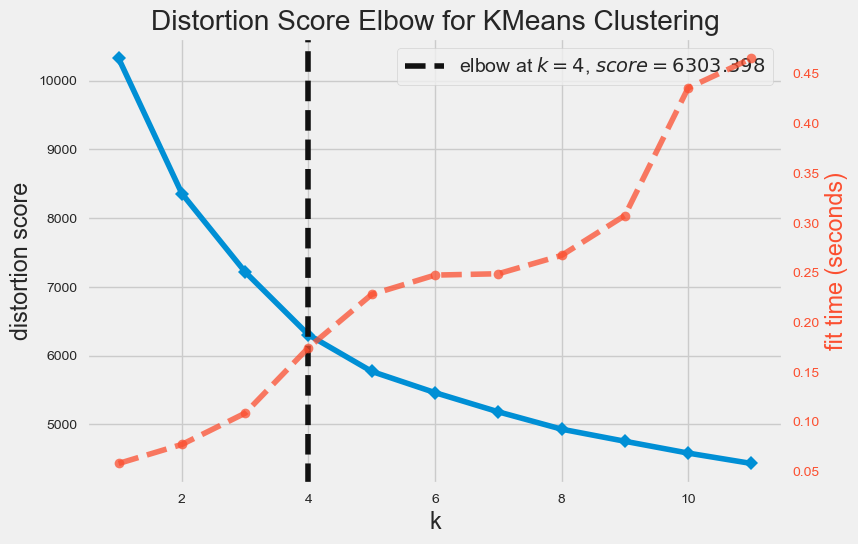

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_minmax)        # Fit the data to the visualizer
visualizer.show() 

## K means

In [34]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=94)# importanza di random state per ottenere gli stessi risultati
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=4, random_state=94)

In [35]:
kmeans.labels_

array([3, 1, 3, ..., 3, 0, 0], dtype=int32)

In [36]:
# ndarray of shape (n_clusters, n_features)
kmeans.cluster_centers_ ##centroidi

array([[0.35410982, 0.58626949, 0.73985021, 0.68365793, 0.19111834,
        0.22644793, 0.03245126, 0.25429615, 0.53282454, 0.51807277,
        0.73960274, 0.35249037, 0.34104242, 0.10051261],
       [0.29706797, 0.45001601, 0.29728511, 0.41681523, 0.11111702,
        0.79818723, 0.49909362, 0.18541341, 0.27931915, 0.41254207,
        0.69446081, 0.24366703, 0.24912791, 0.45707767],
       [0.35651263, 0.58425796, 0.74308696, 0.68561898, 0.19010417,
        0.20855072, 0.03663527, 0.25166025, 0.53150242, 0.51549149,
        0.73880952, 0.35351132, 0.34259985, 0.78385862],
       [0.44875437, 0.56016565, 0.76419853, 0.61333412, 0.16274991,
        0.07170467, 0.79315679, 0.20989304, 0.35808839, 0.52090064,
        0.73279222, 0.44988419, 0.43695093, 0.40878702]])

In [37]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)# stesso scaler anche per i k
centers

array([[ 2.36602508e+02,  5.95230623e-01,  7.39850214e-01,
        -6.35240609e+00,  8.11578697e-02,  2.26447932e-01,
         3.24512601e-02,  2.10893961e-01,  5.32824536e-01,
         1.28007801e+02,  3.95841095e+00,  4.95942463e+02,
         1.25318592e+02,  1.08370185e+00],
       [ 2.01910800e+02,  4.68514894e-01,  2.97285106e-01,
        -1.43763660e+01,  5.55574468e-02,  7.98187234e-01,
         4.99093617e-01,  1.56476596e-01,  2.79319149e-01,
         1.08108932e+02,  3.77784324e+00,  3.54254468e+02,
         9.37000000e+01,  2.26749787e+00],
       [ 2.38063853e+02,  5.93359903e-01,  7.43086957e-01,
        -6.29343720e+00,  8.08333333e-02,  2.08550725e-01,
         3.66352657e-02,  2.08811594e-01,  5.31502415e-01,
         1.27521075e+02,  3.95523806e+00,  4.97271739e+02,
         1.25854348e+02,  3.35241063e+00],
       [ 2.94163434e+02,  5.70954051e-01,  7.64198527e-01,
        -8.46704314e+00,  7.20799719e-02,  7.17046650e-02,
         7.93156787e-01,  1.75815503e-01,  3.

In [38]:
dk['kmeans_labels'] = kmeans.labels_
dk['kmeans_labels'] = dk['kmeans_labels'].map({0:"A", 1:'B', 2:"C", 3:'D'})

In [39]:
dk[['kmeans_labels']]

kmeans_labels
0                 D
1                 B
2                 D
3                 A
4                 C
...             ...
13542             D
13543             B
13544             D
13545             A
13546             A

[13547 rows x 1 columns]

In [40]:
dk

duration_ms  danceability  energy  loudness  speechiness  acousticness  \
0           241.76          0.69    0.51    -12.53         0.10          0.30   
1           444.00          0.07    0.20    -24.80         0.08          0.28   
2           333.51          0.36    0.85     -7.44         0.04          0.00   
3           269.80          0.52    0.58     -5.61         0.08          0.07   
4           307.65          0.64    0.69    -11.34         0.05          0.00   
...            ...           ...     ...       ...          ...           ...   
13542       432.03          0.55    0.66    -14.23         0.06          0.02   
13543       182.75          0.10    0.86    -19.63         0.06          0.55   
13544       400.09          0.80    0.54     -9.10         0.06          0.00   
13545       197.25          0.51    0.97     -2.30         0.05          0.00   
13546       198.41          0.68    0.52     -7.79         0.04          0.46   

       instrumentalness  liveness  valence   tempo  time_signature  n_beats  \
0                  0.54      0.28     0.64  142.22          4.0000    567.0   
1                  0.93      0.36     0.03   75.60          4.0000    617.0   
2                  0.80      0.26     0.49  116.63          4.0000    652.0   
3                  0.00      0.12     0.38  140.88          4.0000    619.0   
4                  0.10      0.30     0.64  143.96          4.0000    733.0   
...                 ...       ...      ...     ...             ...      ...   
13542              0.62      0.13     0.03  117.32          3.9201    837.0   
13543              0.94      0.12     0.00   92.32          3.0000    277.0   
13544              0.86      0.07     0.07  126.00          4.0000    837.0   
13545              0.00      0.40     0.27  160.04          4.0000    513.0   
13546              0.00      0.09     0.78   88.00          4.0000    286.0   

       n_bars  processing kmeans_labels  
0       141.0        1.28             D  
1       155.0        2.37             B  
2       162.0        3.70             D  
3       155.0        1.28             A  
4       183.0        4.07             C  
...       ...         ...           ...  
13542   212.0        2.37             D  
13543    92.0        2.37             B  
13544   209.0        2.37             D  
13545   130.0        1.28             A  
13546    72.0        1.17             A  

[13547 rows x 15 columns]

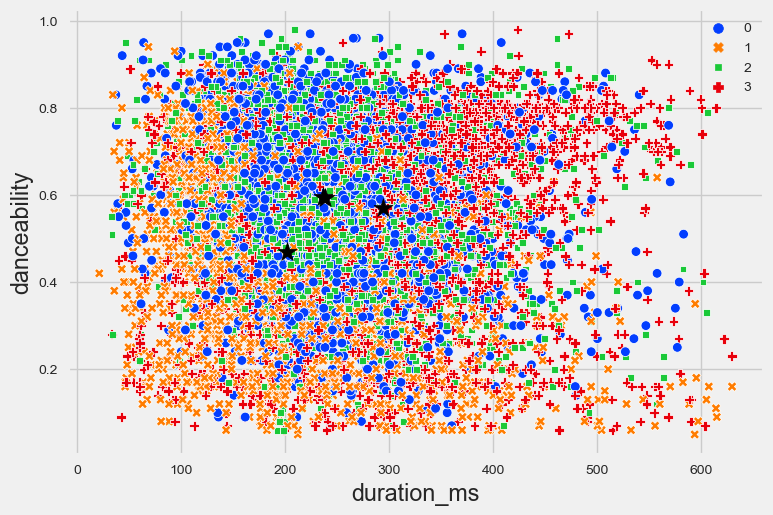

In [41]:
sns.scatterplot(data=dk, x="duration_ms", y="danceability",  hue=kmeans.labels_, style=kmeans.labels_,
                palette="bright")
plt.legend()
plt.scatter(centers[:,0], centers[:,1], c='black', marker='*', s=200) #prendo le colonne e fisso i centroidi
plt.show()

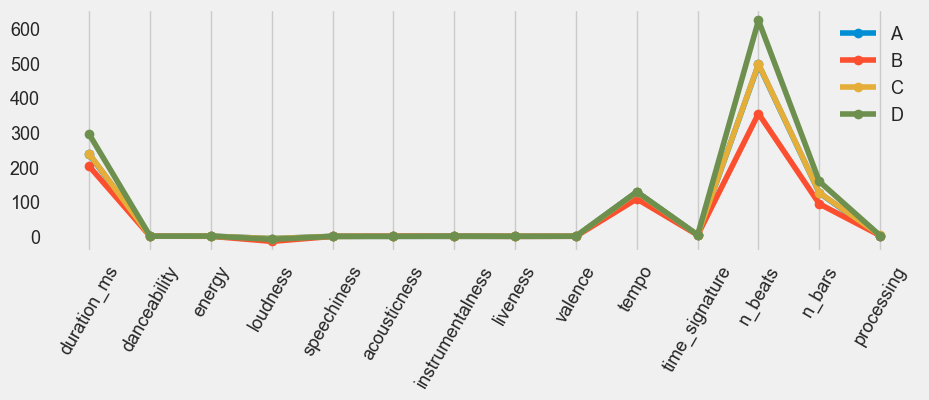

In [42]:
plt.figure(figsize=(10, 3)) ##grafico per i centroidi

clust_name = ['A', 'B', 'C', 'D']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0, len(dk.columns) - 1), dk.columns[:-1], fontsize=13, rotation=60)

plt.yticks(fontsize=13)

plt.legend(fontsize=13, loc='best')
plt.grid(axis='y')

In [43]:
#y_mapped.groupby(dk['kmeans_labels']).value_counts(normalize=True)# normalize per avere tutto in percentuale

In [27]:
%%time
sse_list = []
## vediamo come cambia sse in relazione alle iterazioni
for k in range(2, 100): # 1 è inutile, vuol dire avere tutto insieme. 51 non è obbligatorio, si può mettere anche 100, visualizziamo di più sulla x
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

CPU times: user 18min 43s, sys: 3min 18s, total: 22min 2s
Wall time: 3min 21s


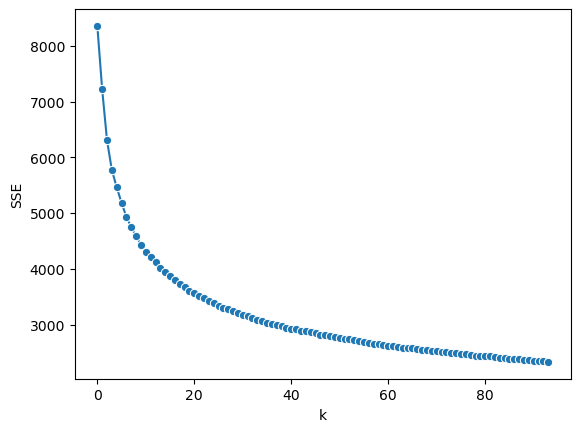

In [62]:
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show() # cosa sse sta facendo 

In [44]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_list = []

dist = squareform(pdist(X_minmax, metric='euclidean'))  # Calcola la matrice delle distanze

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    silhouette_avg = silhouette_score(dist, kmeans.labels_, metric='precomputed')
    sil_list.append(silhouette_avg)


In [45]:
from sklearn.metrics import silhouette_score

# X è il tuo dataset
# labels sono le etichette di cluster assegnate a ciascuna osservazione
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.23873910685969643


In [46]:
print('SSE', kmeans.inertia_) 
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 2782.3824012800706
Silhouette 0.1173068196230279


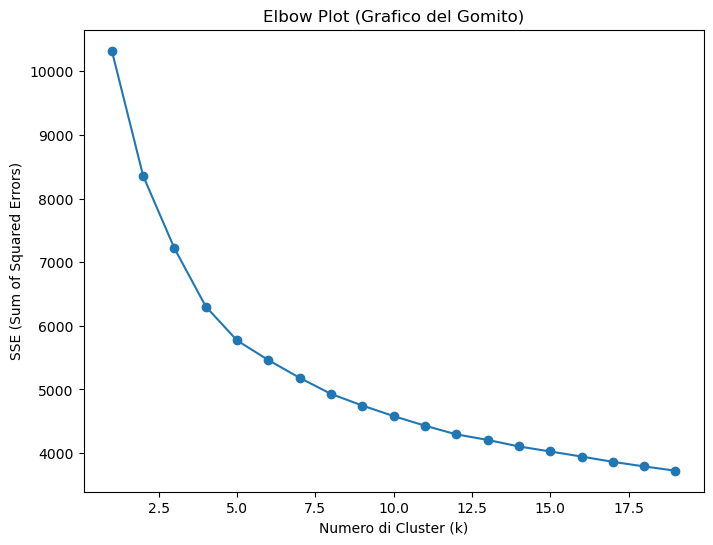

In [133]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista vuota per immagazzinare i valori di SSE
sse = []

# Calcolo dell'SSE per diversi valori di k
for k in range(1, 20):  # Range di valori di k (da 1 a 10, ad esempio)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_minmax)  # 'data' è il dataset su cui eseguire il clustering
    sse.append(kmeans.inertia_)  # kmeans.inertia_ restituisce l'SSE per il modello corrente

# Plot del grafico del "gomito"
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), sse, marker='o')
plt.title('Elbow Plot (Grafico del Gomito)')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('SSE (Sum of Squared Errors)')

plt.show()


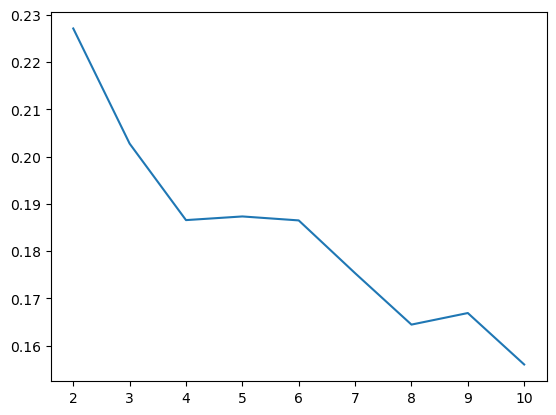

In [89]:
from sklearn.metrics import silhouette_score
silhouettes = []
kmin = 2
kmax = 10
for k in range(kmin, kmax+1):
# We fit the KMeans algo with k clusters
    kmeans = KMeans(n_clusters = k).fit(X_minmax)
    labels = kmeans.labels_
# We calculate the silhouette score and append it to the silhouette list
    silhouettes.append(silhouette_score(X_minmax, labels, metric = 'euclidean'))
plt.plot(range(kmin,kmax+1),silhouettes)
plt.show()

## DBSCAN

In [114]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X_minmax)

DBSCAN(min_samples=10)

In [115]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
print('Silhouette', silhouette_score(X_minmax, dbscan.labels_))

Silhouette 0.19719223195654637


In [117]:
silhouette_score(X_minmax, dbscan.labels_)

0.19719223195654637

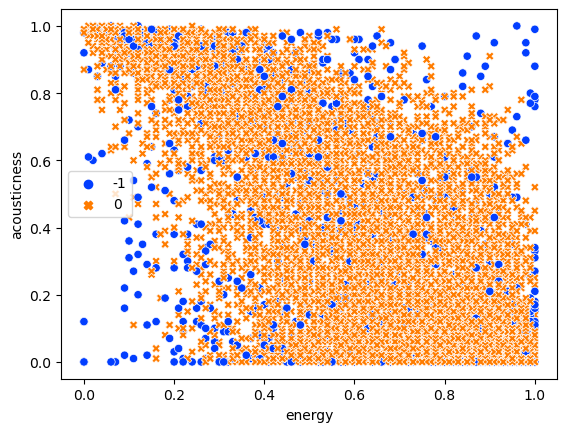

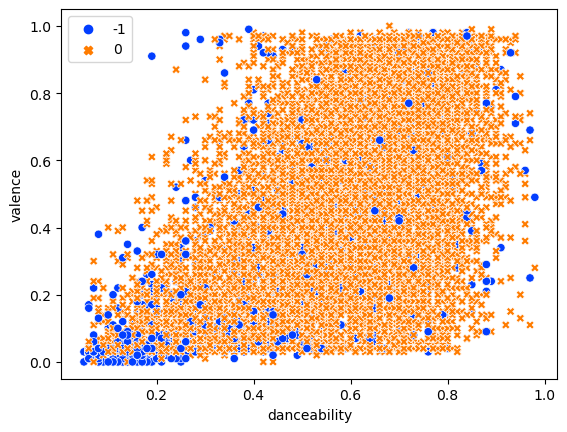

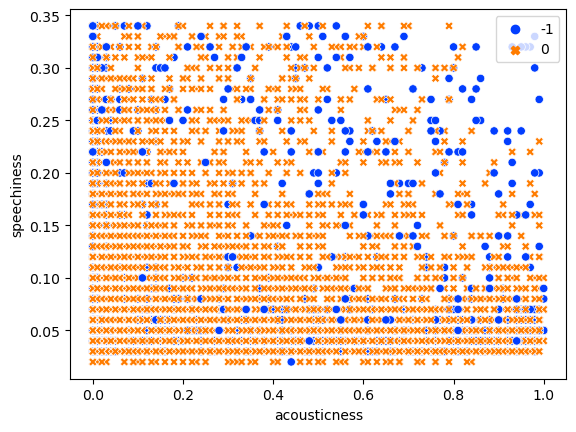

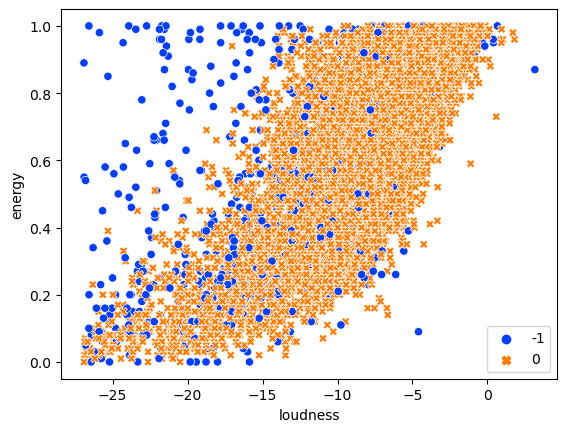

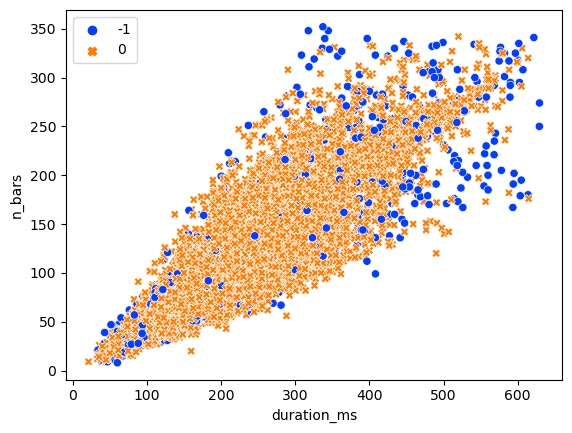

In [28]:
sns.scatterplot(data=dk, 
                x="energy", 
                y="acousticness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


sns.scatterplot(data=dk, 
                x="danceability", 
                y="valence", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


sns.scatterplot(data=dk, 
                x="acousticness", 
                y="speechiness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

sns.scatterplot(data=dk, 
                x="loudness", 
                y="energy", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

sns.scatterplot(data=dk, 
                x="duration_ms", 
                y="n_bars", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


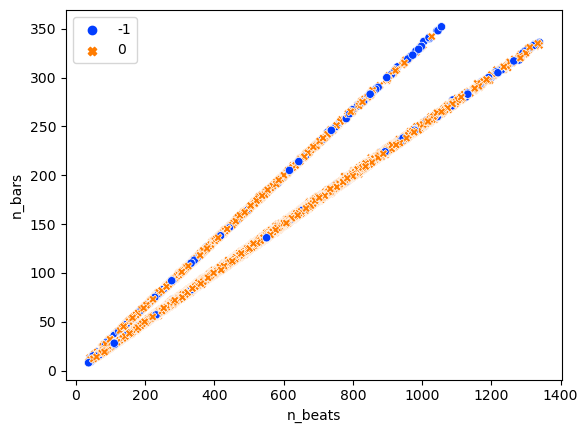

In [29]:
sns.scatterplot(data=dk, 
                x="n_beats", 
                y="n_bars", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


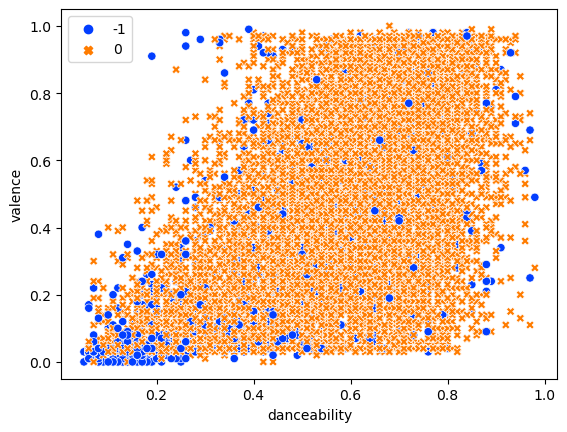

In [30]:
sns.scatterplot(data=dk, 
                x="danceability", 
                y="valence", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


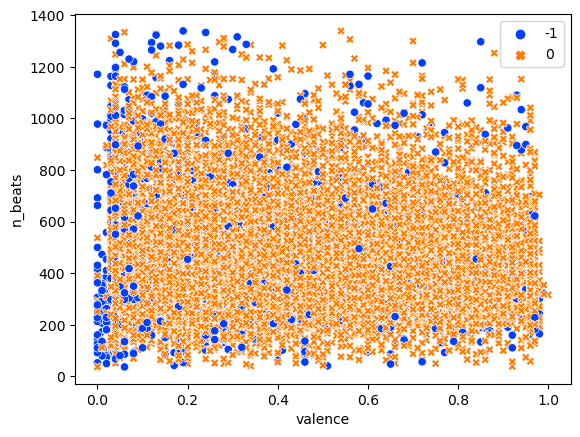

In [31]:
sns.scatterplot(data=dk, 
                x="valence", 
                y="n_beats", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


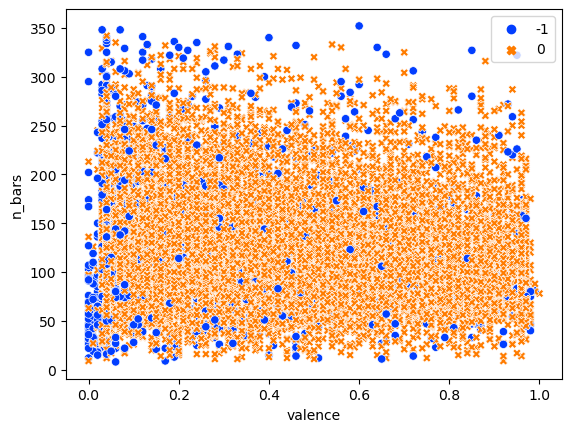

In [32]:
sns.scatterplot(data=dk, 
                x="valence", 
                y="n_bars", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

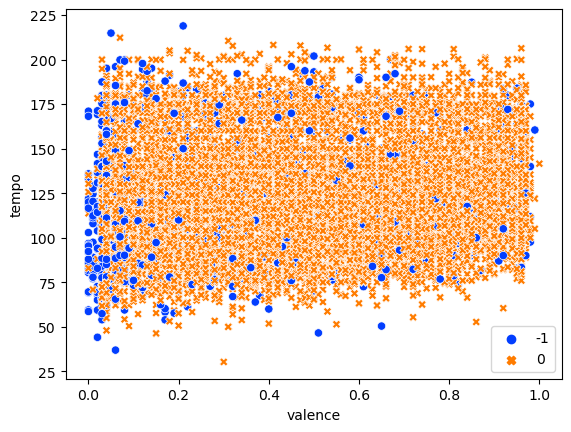

In [33]:
sns.scatterplot(data=dk, 
                x="valence", 
                y="tempo", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()

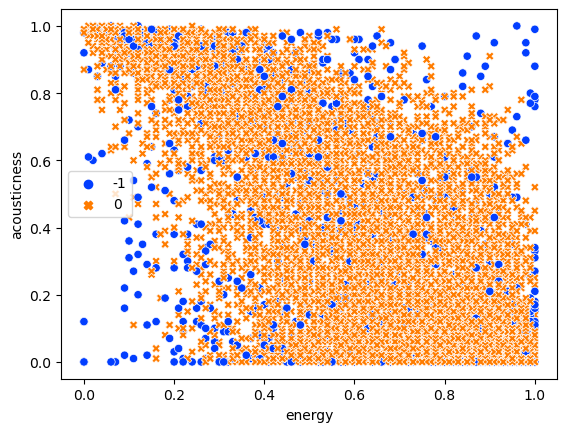

In [34]:
sns.scatterplot(data=dk, 
                x="energy", 
                y="acousticness", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


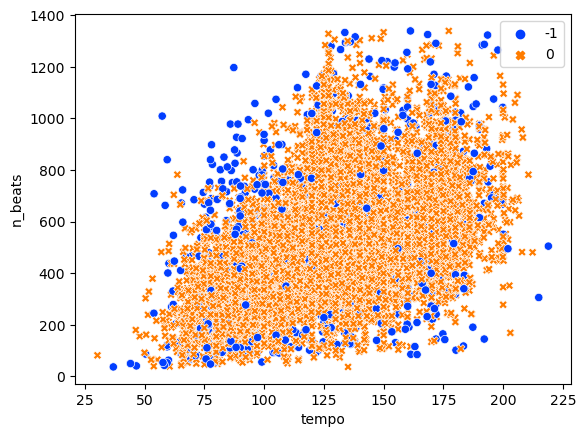

In [35]:
sns.scatterplot(data=dk, 
                x="tempo", 
                y="n_beats", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


## kt neighbor

In [36]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

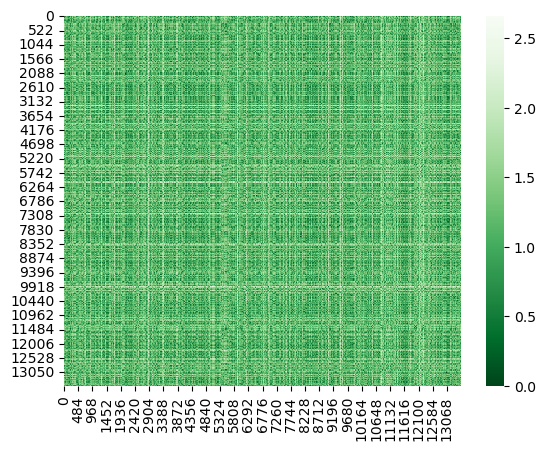

In [37]:
sns.heatmap(dist, cmap="Greens_r", annot=False)
plt.show()

In [38]:
k=4
kth_distances = [] #si misurano le distanze tra ogni punto
for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

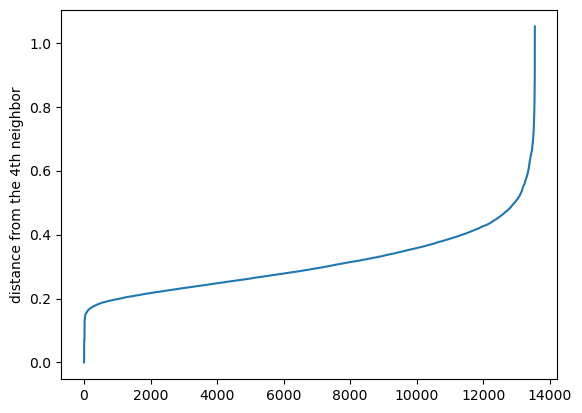

In [39]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()

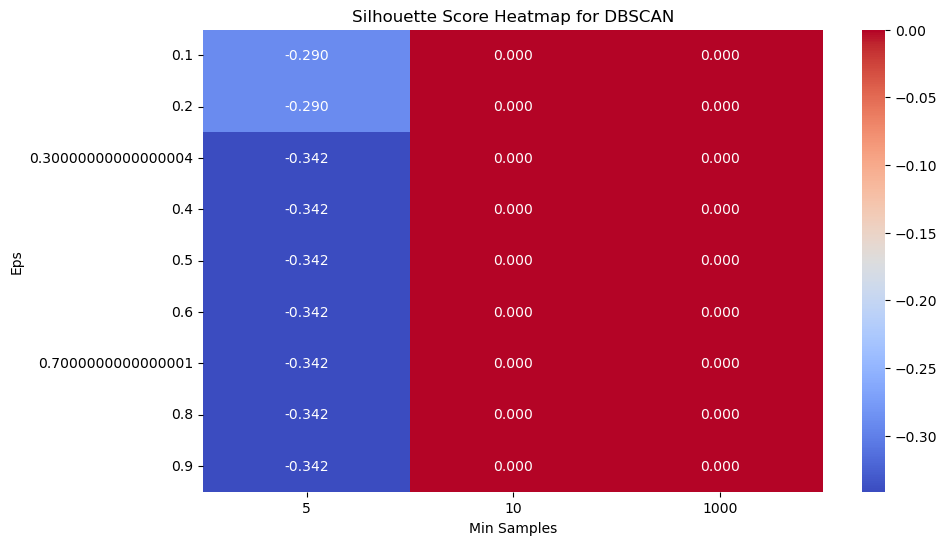

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Crea una griglia di valori di eps e min_samples da testare
eps_values = np.arange(0.1, 1.0, 0.1)  # Esempio di valori eps
min_samples_values = [5, 10, 1000]  # Esempio di valori min_samples

# Inizializza una matrice per memorizzare i Silhouette Scores
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Esegui il clustering per diverse combinazioni di parametri
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(X, labels)
            silhouette_scores[i, j] = silhouette_avg

# Crea un grafico heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, fmt='.3f', cmap='coolwarm',
            xticklabels=min_samples_values, yticklabels=eps_values)
plt.xlabel('Min Samples')
plt.ylabel('Eps')
plt.title('Silhouette Score Heatmap for DBSCAN')
plt.show()


## Hierarchical

In [90]:
def get_linkage_matrix(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

In [93]:
# setting distance_threshold=0 ensures we compute the full tree.
# it is the linkage distance threshold above which clusters will not be merged
#model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,  ##all'inizio non specifichiamo i cluster che vogliamo
                               # metric='euclidean', linkage='complete')
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete', affinity='euclidean')

model = model.fit(X_minmax)

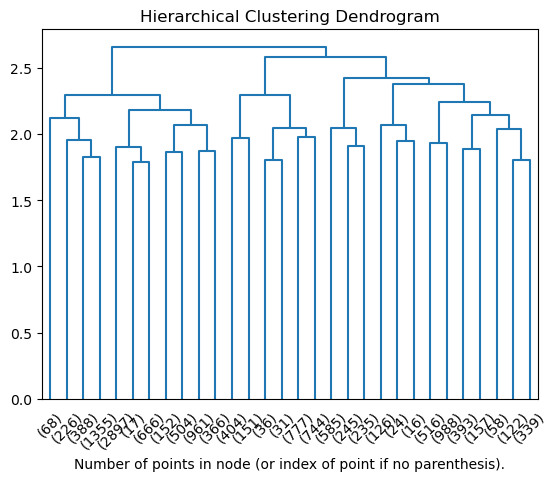

In [94]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode='lastp', color_threshold=1.4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [121]:
Z = get_linkage_matrix(model)
labels = fcluster(Z, t=2.6, criterion='distance')

In [122]:
labels

array([2, 2, 2, ..., 2, 1, 1], dtype=int32)

In [123]:
print('Silhouette', silhouette_score(X_minmax, labels))

Silhouette 0.16152622138894068


## choosing number of clusters

In [168]:
hier = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [169]:
hier.labels_

array([3, 0, 2, ..., 2, 1, 1])

## precomputed distance matrix

In [170]:
hier = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete')
hier.fit(dist) 

AgglomerativeClustering(affinity='precomputed', linkage='complete',
                        n_clusters=4)

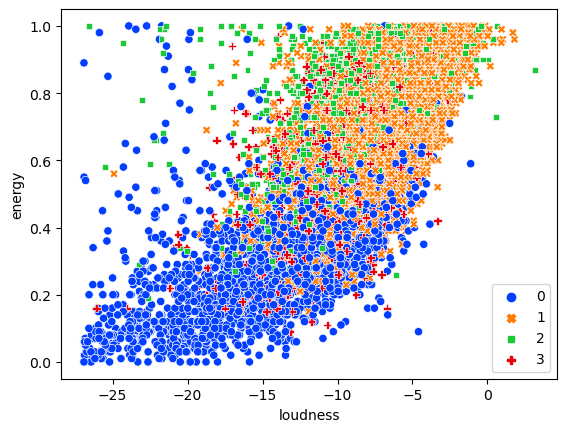

In [171]:
sns.scatterplot(data=dk, 
                x="loudness",
                y="energy", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

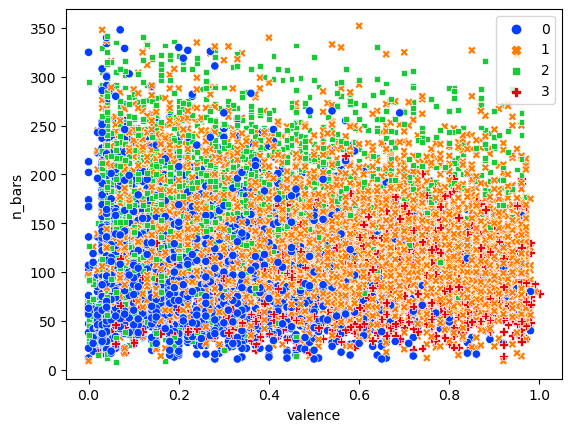

In [172]:
sns.scatterplot(data=dk, 
                x="valence",
                y="n_bars", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

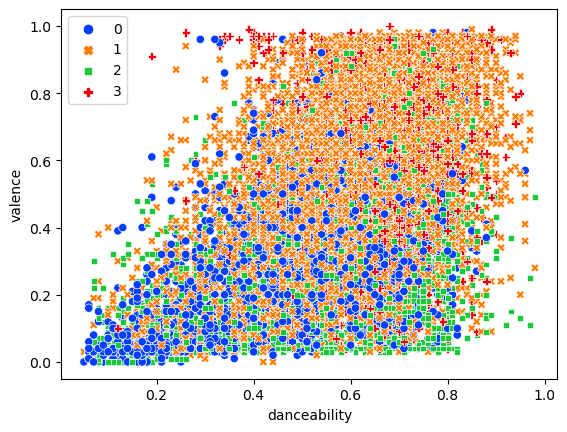

In [173]:
sns.scatterplot(data=dk, 
                x="danceability",
                y="valence", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

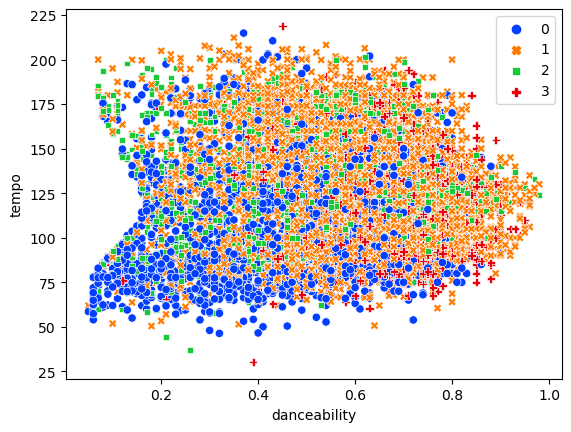

In [174]:
sns.scatterplot(data=dk, 
                x="danceability",
                y="tempo", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

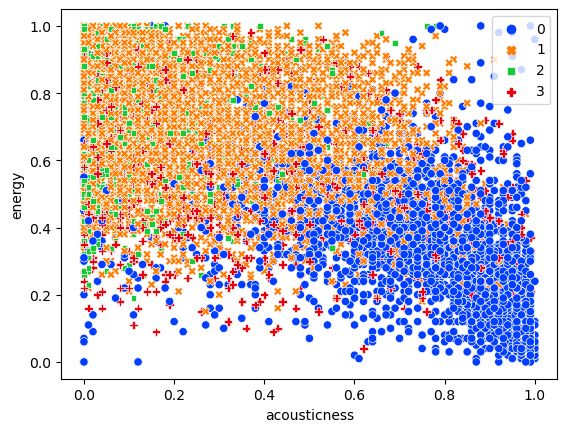

In [175]:
sns.scatterplot(data=dk, 
                x="acousticness",
                y="energy", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

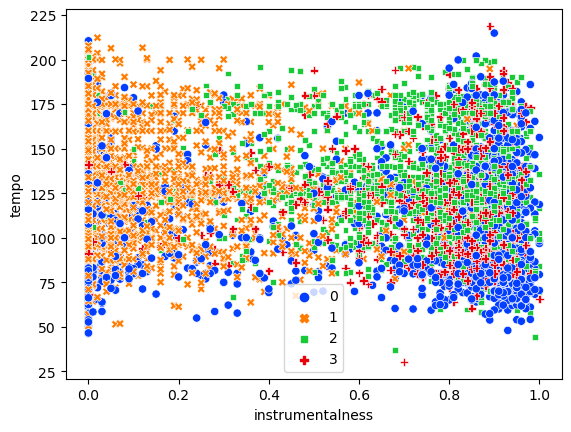

In [176]:
sns.scatterplot(data=dk, 
                x="instrumentalness",
                y="tempo", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

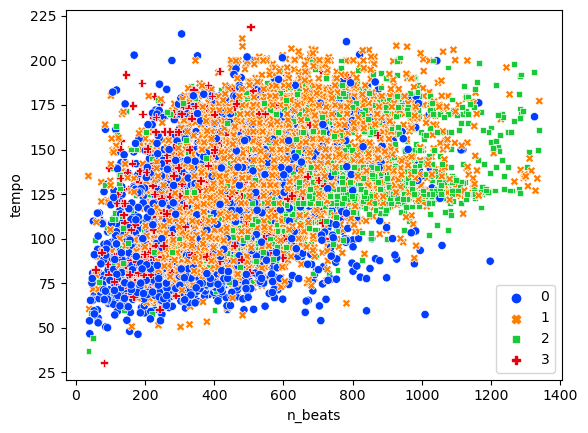

In [177]:
sns.scatterplot(data=dk, 
                x="n_beats",
                y="tempo", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

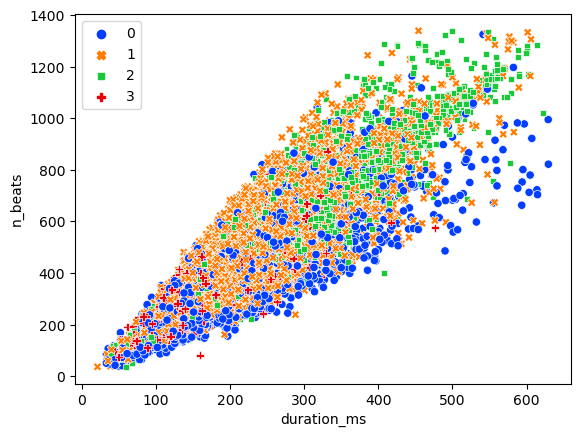

In [178]:
sns.scatterplot(data=dk, 
                x="duration_ms",
                y="n_beats", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

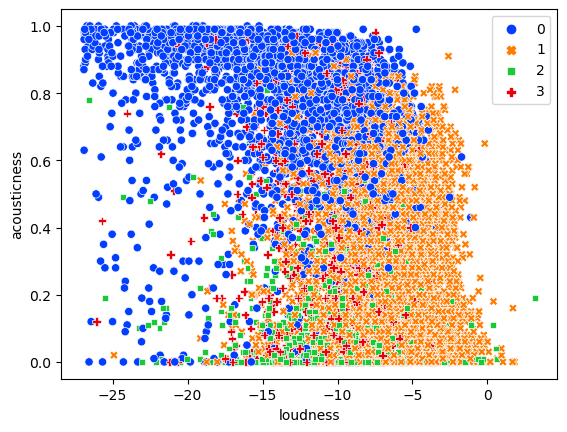

In [179]:
sns.scatterplot(data=dk, 
                x="loudness",
                y="acousticness", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

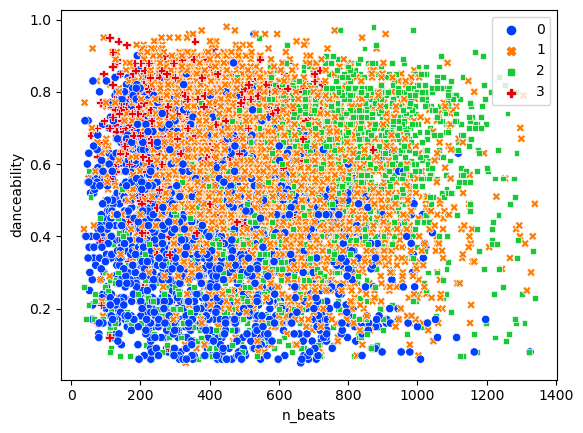

In [180]:
sns.scatterplot(data=dk, 
                x="n_beats",
                y="danceability", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

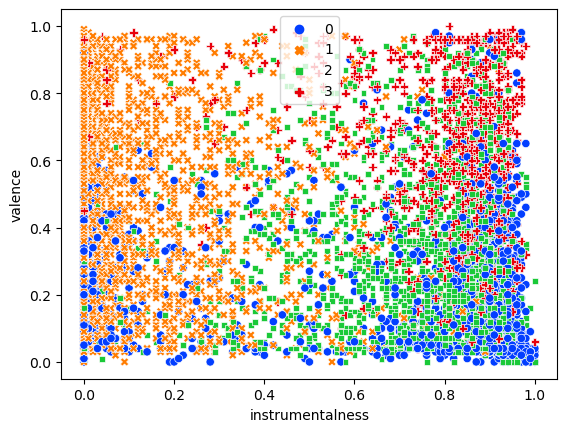

In [181]:
sns.scatterplot(data=dk, 
                x="instrumentalness",
                y="valence", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

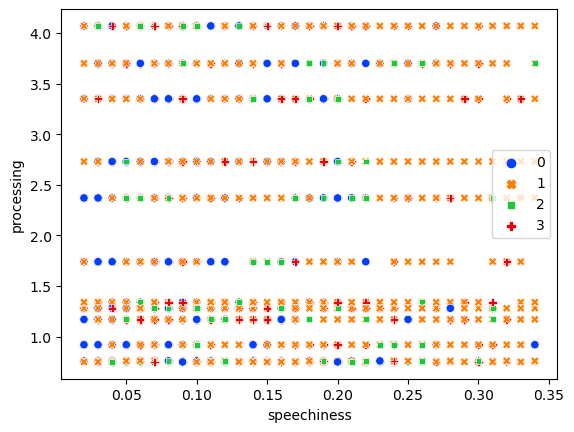

In [182]:
sns.scatterplot(data=dk, 
                x="speechiness",
                y="processing", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()

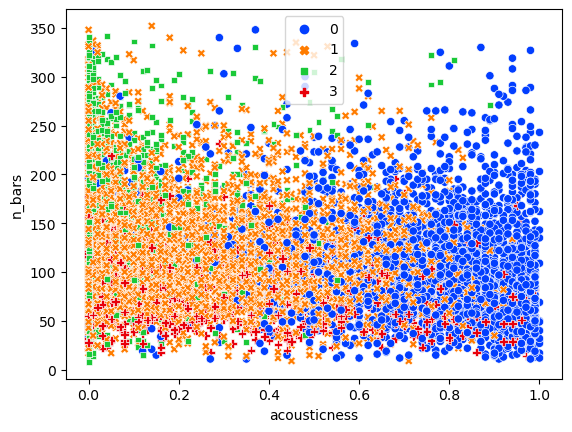

In [183]:
sns.scatterplot(data=dk, 
                x="acousticness",
                y="n_bars", 
                hue=hier.labels_, 
                style=hier.labels_, 
                palette="bright")
plt.show()